In [41]:
from pathlib import Path
import tomllib
import pandas as pd

with (Path().cwd()/".."/"config.toml").open("rb") as f:
    config = tomllib.load(f)
    config_exp = config[Path().cwd().name]
    config_input = config_exp["input"]



In [42]:
instance_df = pd.read_json(config_exp["output"]["aggregated_table"])
instance_df

,num_vars,num_clauses,best_ub,best_lb,samplns_ub,samplns_lb,baseline_ub,time_initial_solution,time_last_update_15min,time_last_update_3h
calculate,9,15,5,5,5.0,5.0,9,0.349753,0.409805,0.509709
lcm,9,16,6,6,6.0,6.0,8,0.320516,0.362959,0.459972
email,10,17,6,6,6.0,6.0,6,0.320861,0.390224,0.476566
ChatClient,14,20,7,7,7.0,7.0,7,0.370952,1.386273,1.897152
toybox_2006-10-31_23-30-06,16,13,8,8,8.0,8.0,9,0.392972,1.462752,1.492623
car,16,33,5,5,5.0,5.0,6,0.285722,0.350269,0.417284
FeatureIDE,19,27,8,8,8.0,8.0,9,0.372879,270.834257,127.857561
FameDB,22,40,8,8,8.0,8.0,8,0.325365,1.142090,1.180048
APL,23,35,7,7,7.0,7.0,9,0.376910,1.216988,1.243059
SafeBali,24,45,11,11,11.0,11.0,11,0.289868,0.348789,0.371186


In [43]:
baseline_df = pd.read_json(config_exp["output"]["baseline_data"])
baseline_df = baseline_df.dropna().groupby(["instance", "algorithm"])[["upper_bound"]].mean().reset_index()
baseline_df

,instance,algorithm,upper_bound
0,APL,ACTS-IPOF-CSP,10.6
1,APL,ACTS-IPOF-FT,10.6
2,APL,ACTS-IPOG-CSP,11.6
3,APL,ACTS-IPOG-FT,11.6
4,APL,Chvatal,12.0
...,...,...,...
456,uclibc_2020-12-24_11-54-53,YASA (15min),366.2
457,uclibc_2020-12-24_11-54-53,YASA (m=1),373.4
458,uclibc_2020-12-24_11-54-53,YASA (m=10),367.0
459,uclibc_2020-12-24_11-54-53,YASA (m=3),368.4


In [44]:
samplns_15min_df = pd.read_json(Path("..")/config_exp["input"]["samplns_15min"]).groupby("instance_name")[["ub"]].mean().reset_index().rename(columns={"instance_name": "instance", "ub": "upper_bound"})
samplns_15min_df["algorithm"] = "SampLNS"
samplns_15min_df = samplns_15min_df[samplns_15min_df["instance"].isin(instance_df.index.to_list())]
samplns_15min_df

,instance,upper_bound,algorithm
0,APL,7.0,SampLNS
1,APL-Model,8.0,SampLNS
2,BankingSoftware,29.0,SampLNS
3,BattleofTanks,320.8,SampLNS
4,ChatClient,7.0,SampLNS
5,DMIE,16.0,SampLNS
6,E-Shop,12.0,SampLNS
7,EMBToolkit,1879.2,SampLNS
8,FameDB,8.0,SampLNS
9,FeatureIDE,8.0,SampLNS


In [45]:
df = pd.concat([baseline_df, samplns_15min_df], ignore_index=True)

df

,instance,algorithm,upper_bound
0,APL,ACTS-IPOF-CSP,10.6
1,APL,ACTS-IPOF-FT,10.6
2,APL,ACTS-IPOG-CSP,11.6
3,APL,ACTS-IPOG-FT,11.6
4,APL,Chvatal,12.0
...,...,...,...
503,soletta_2017-03-09_21-02-40,SampLNS,37.0
504,toybox_2006-10-31_23-30-06,SampLNS,8.0
505,toybox_2020-12-06_00-02-46,SampLNS,13.0
506,uclibc_2008-06-05_13-46-47,SampLNS,505.0


In [46]:
solved_instances = df.groupby("algorithm")["instance"].count().to_dict()
solved_instances

{'ACTS-IPOF-CSP': 22,
 'ACTS-IPOF-FT': 24,
 'ACTS-IPOG-CSP': 22,
 'ACTS-IPOG-FT': 24,
 'Chvatal': 42,
 'ICPL': 46,
 'Incling': 46,
 'SampLNS': 47,
 'YASA (15min)': 47,
 'YASA (m=1)': 47,
 'YASA (m=10)': 47,
 'YASA (m=3)': 47,
 'YASA (m=5)': 47}

/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/krupke/anaconda3/envs/mo312/lib/python3.12/site-packages/seaborn/categorical.p

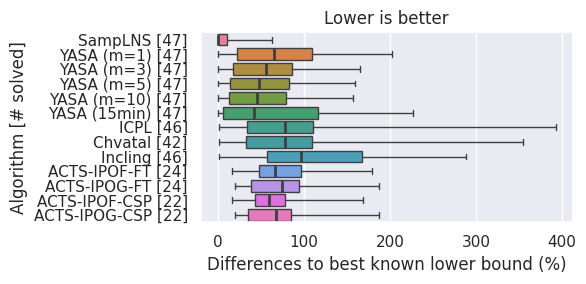

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
t = df.copy()
def order_algs(alg_name):
    if alg_name.startswith("SampLNS"):
        return (0, len(alg_name), alg_name)
    if alg_name.startswith("YASA"):
        return (1, len(alg_name), alg_name)
    if alg_name.startswith("ACTS"):
        return (3, len(alg_name), alg_name)
    return (2, len(alg_name), alg_name)
t["order"] = t["algorithm"].apply(order_algs)
t.sort_values(by=["order"], inplace=True)
t = t.drop(columns=["order"])
t["algorithm"] = t["algorithm"].apply(lambda x: f"{x} [{solved_instances[x]}]")
t = t.merge(right=instance_df[["best_lb"]], left_on="instance", right_index=True)
t["gap"] = 100* ( t["upper_bound"] / t["best_lb"] - 1)
f, ax = plt.subplots(figsize=(6, 3))
plt.title("Lower is better")
sns.boxplot(
    data=t, y="algorithm", x="gap", medianprops={"linewidth": 2.0}, whis=(0, 100),hue="algorithm", dodge=False, linewidth=1.0
)
plt.xlabel("Differences to best known lower bound (%)")
plt.ylabel("Algorithm [# solved]")
# plt.legend(loc="lower right", title="Evaluation method")
# plt.xlim(0, 140)
plt.tight_layout()
plt.savefig(config_exp["output"]["boxplot_lb"])
plt.show()

In [48]:
t.groupby("algorithm")["gap"].median()

algorithm
ACTS-IPOF-CSP [22]    59.583333
ACTS-IPOF-FT [24]     65.948276
ACTS-IPOG-CSP [22]    67.770936
ACTS-IPOG-FT [24]     74.396552
Chvatal [42]          77.500000
ICPL [46]             78.000000
Incling [46]          96.551724
SampLNS [47]           0.000000
YASA (15min) [47]     42.222222
YASA (m=1) [47]       65.000000
YASA (m=10) [47]      45.517241
YASA (m=3) [47]       56.250000
YASA (m=5) [47]       47.586207
Name: gap, dtype: float64

In [49]:
t[t["algorithm"].str.contains("SampLNS")]["gap"].quantile(0.75)

10.263157894736853

In [53]:
t[t["algorithm"].str.contains("(m=10)")]["gap"].quantile(0.25)

/tmp/ipykernel_203723/4220152937.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  t[t["algorithm"].str.contains("(m=10)")]["gap"].quantile(0.25)


12.79569892473118